![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [46]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [47]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [48]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


In [49]:
penguins_df = pd.get_dummies(penguins_df, drop_first=True)

In [50]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


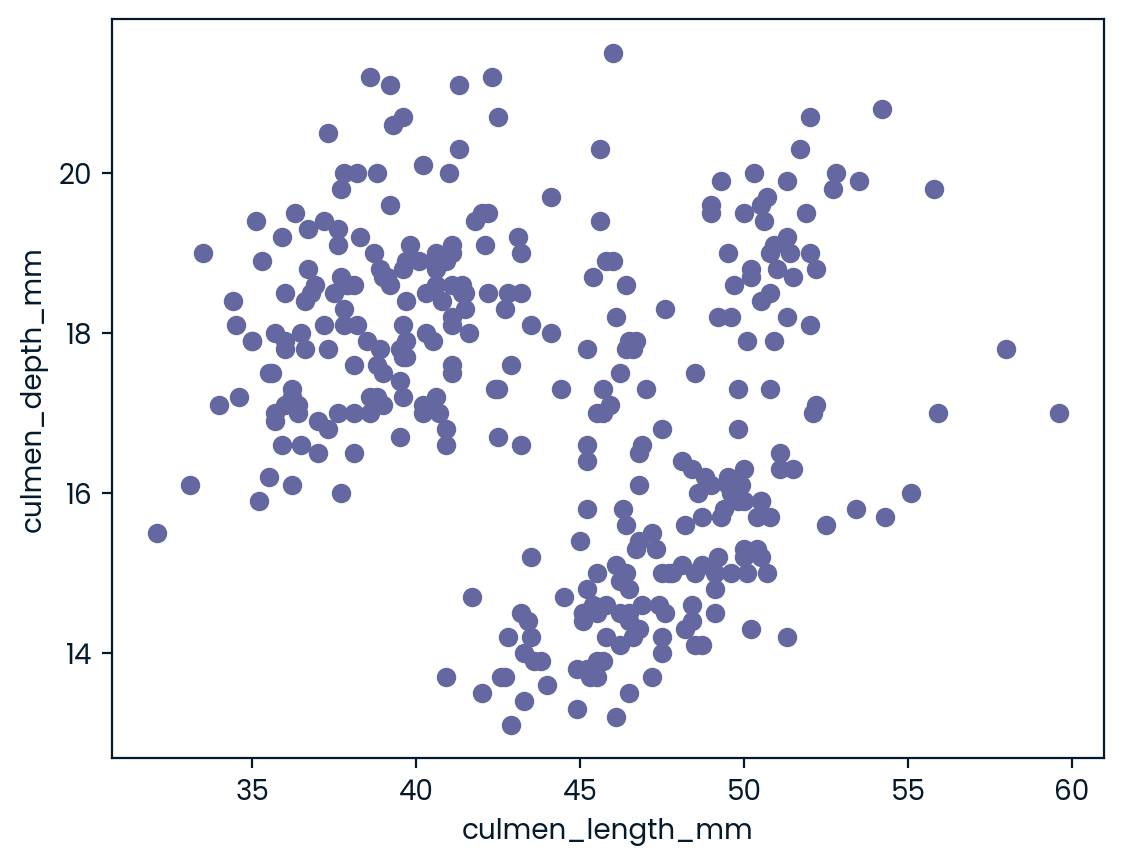

In [51]:
plt.scatter(penguins_df['culmen_length_mm'],penguins_df['culmen_depth_mm'])
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.show()

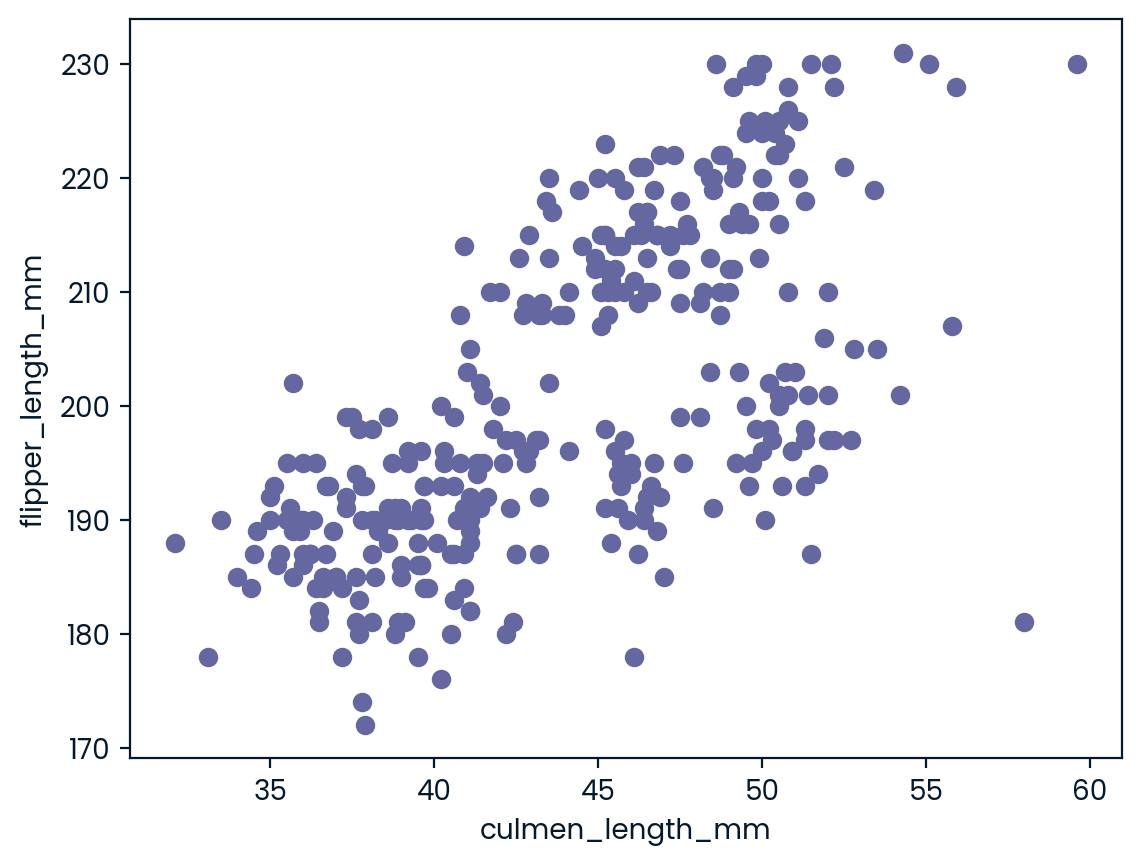

In [52]:
plt.scatter(penguins_df['culmen_length_mm'],penguins_df['flipper_length_mm'])
plt.xlabel('culmen_length_mm')
plt.ylabel('flipper_length_mm')
plt.show()

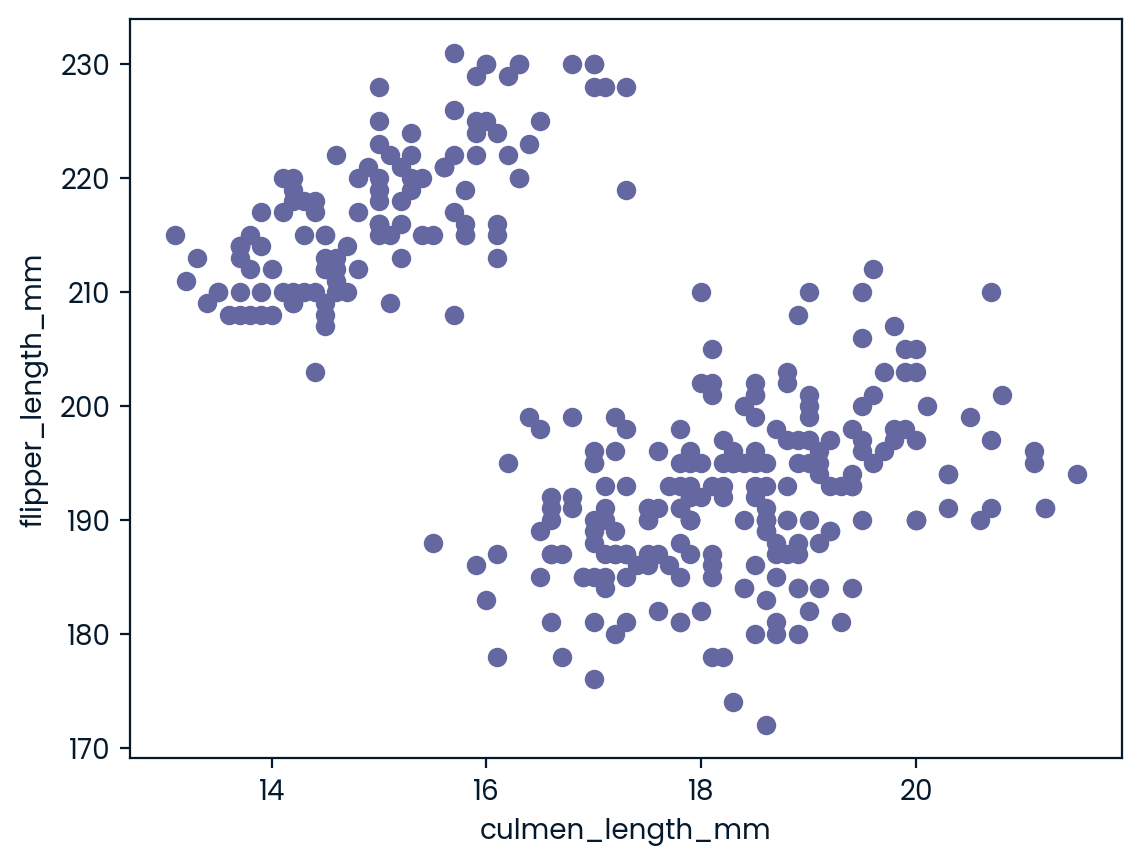

In [53]:
plt.scatter(penguins_df['culmen_depth_mm'],penguins_df['flipper_length_mm'])
plt.xlabel('culmen_length_mm')
plt.ylabel('flipper_length_mm')
plt.show()

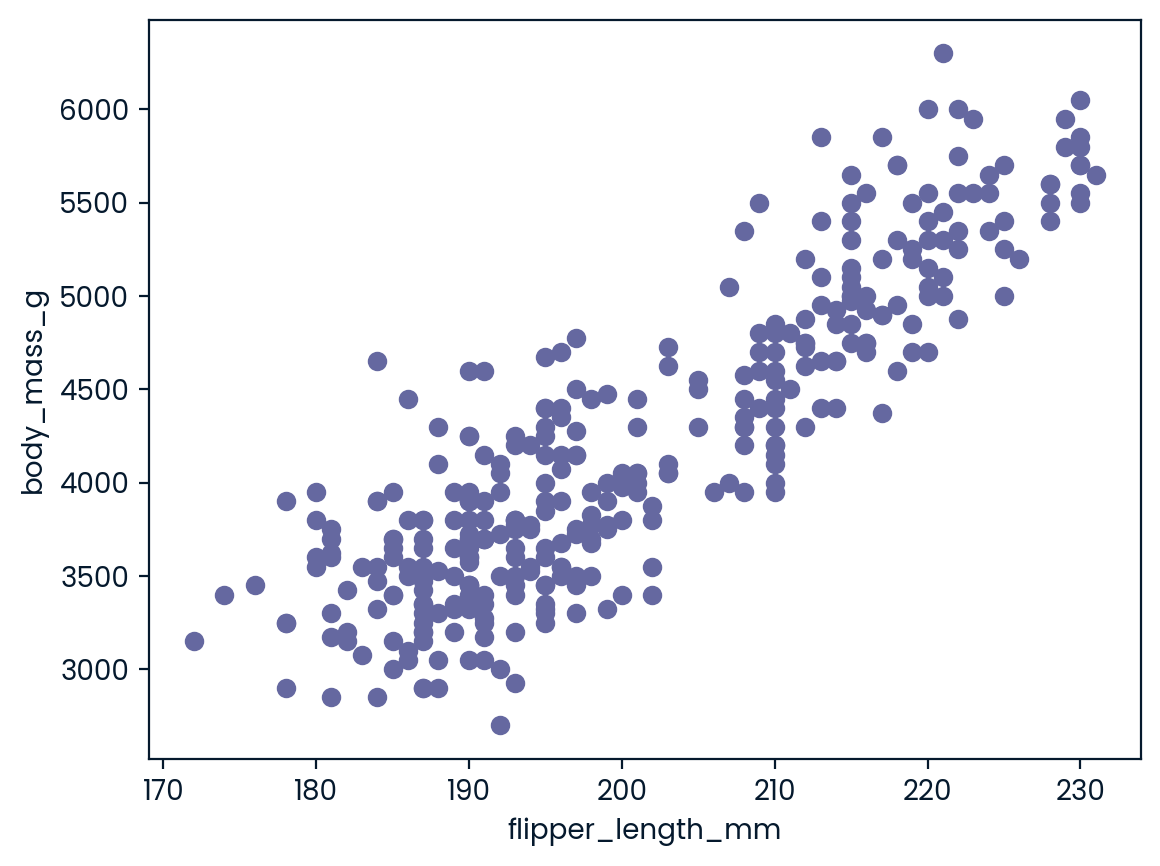

In [54]:
plt.scatter(penguins_df['flipper_length_mm'],penguins_df['body_mass_g'])
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.show()

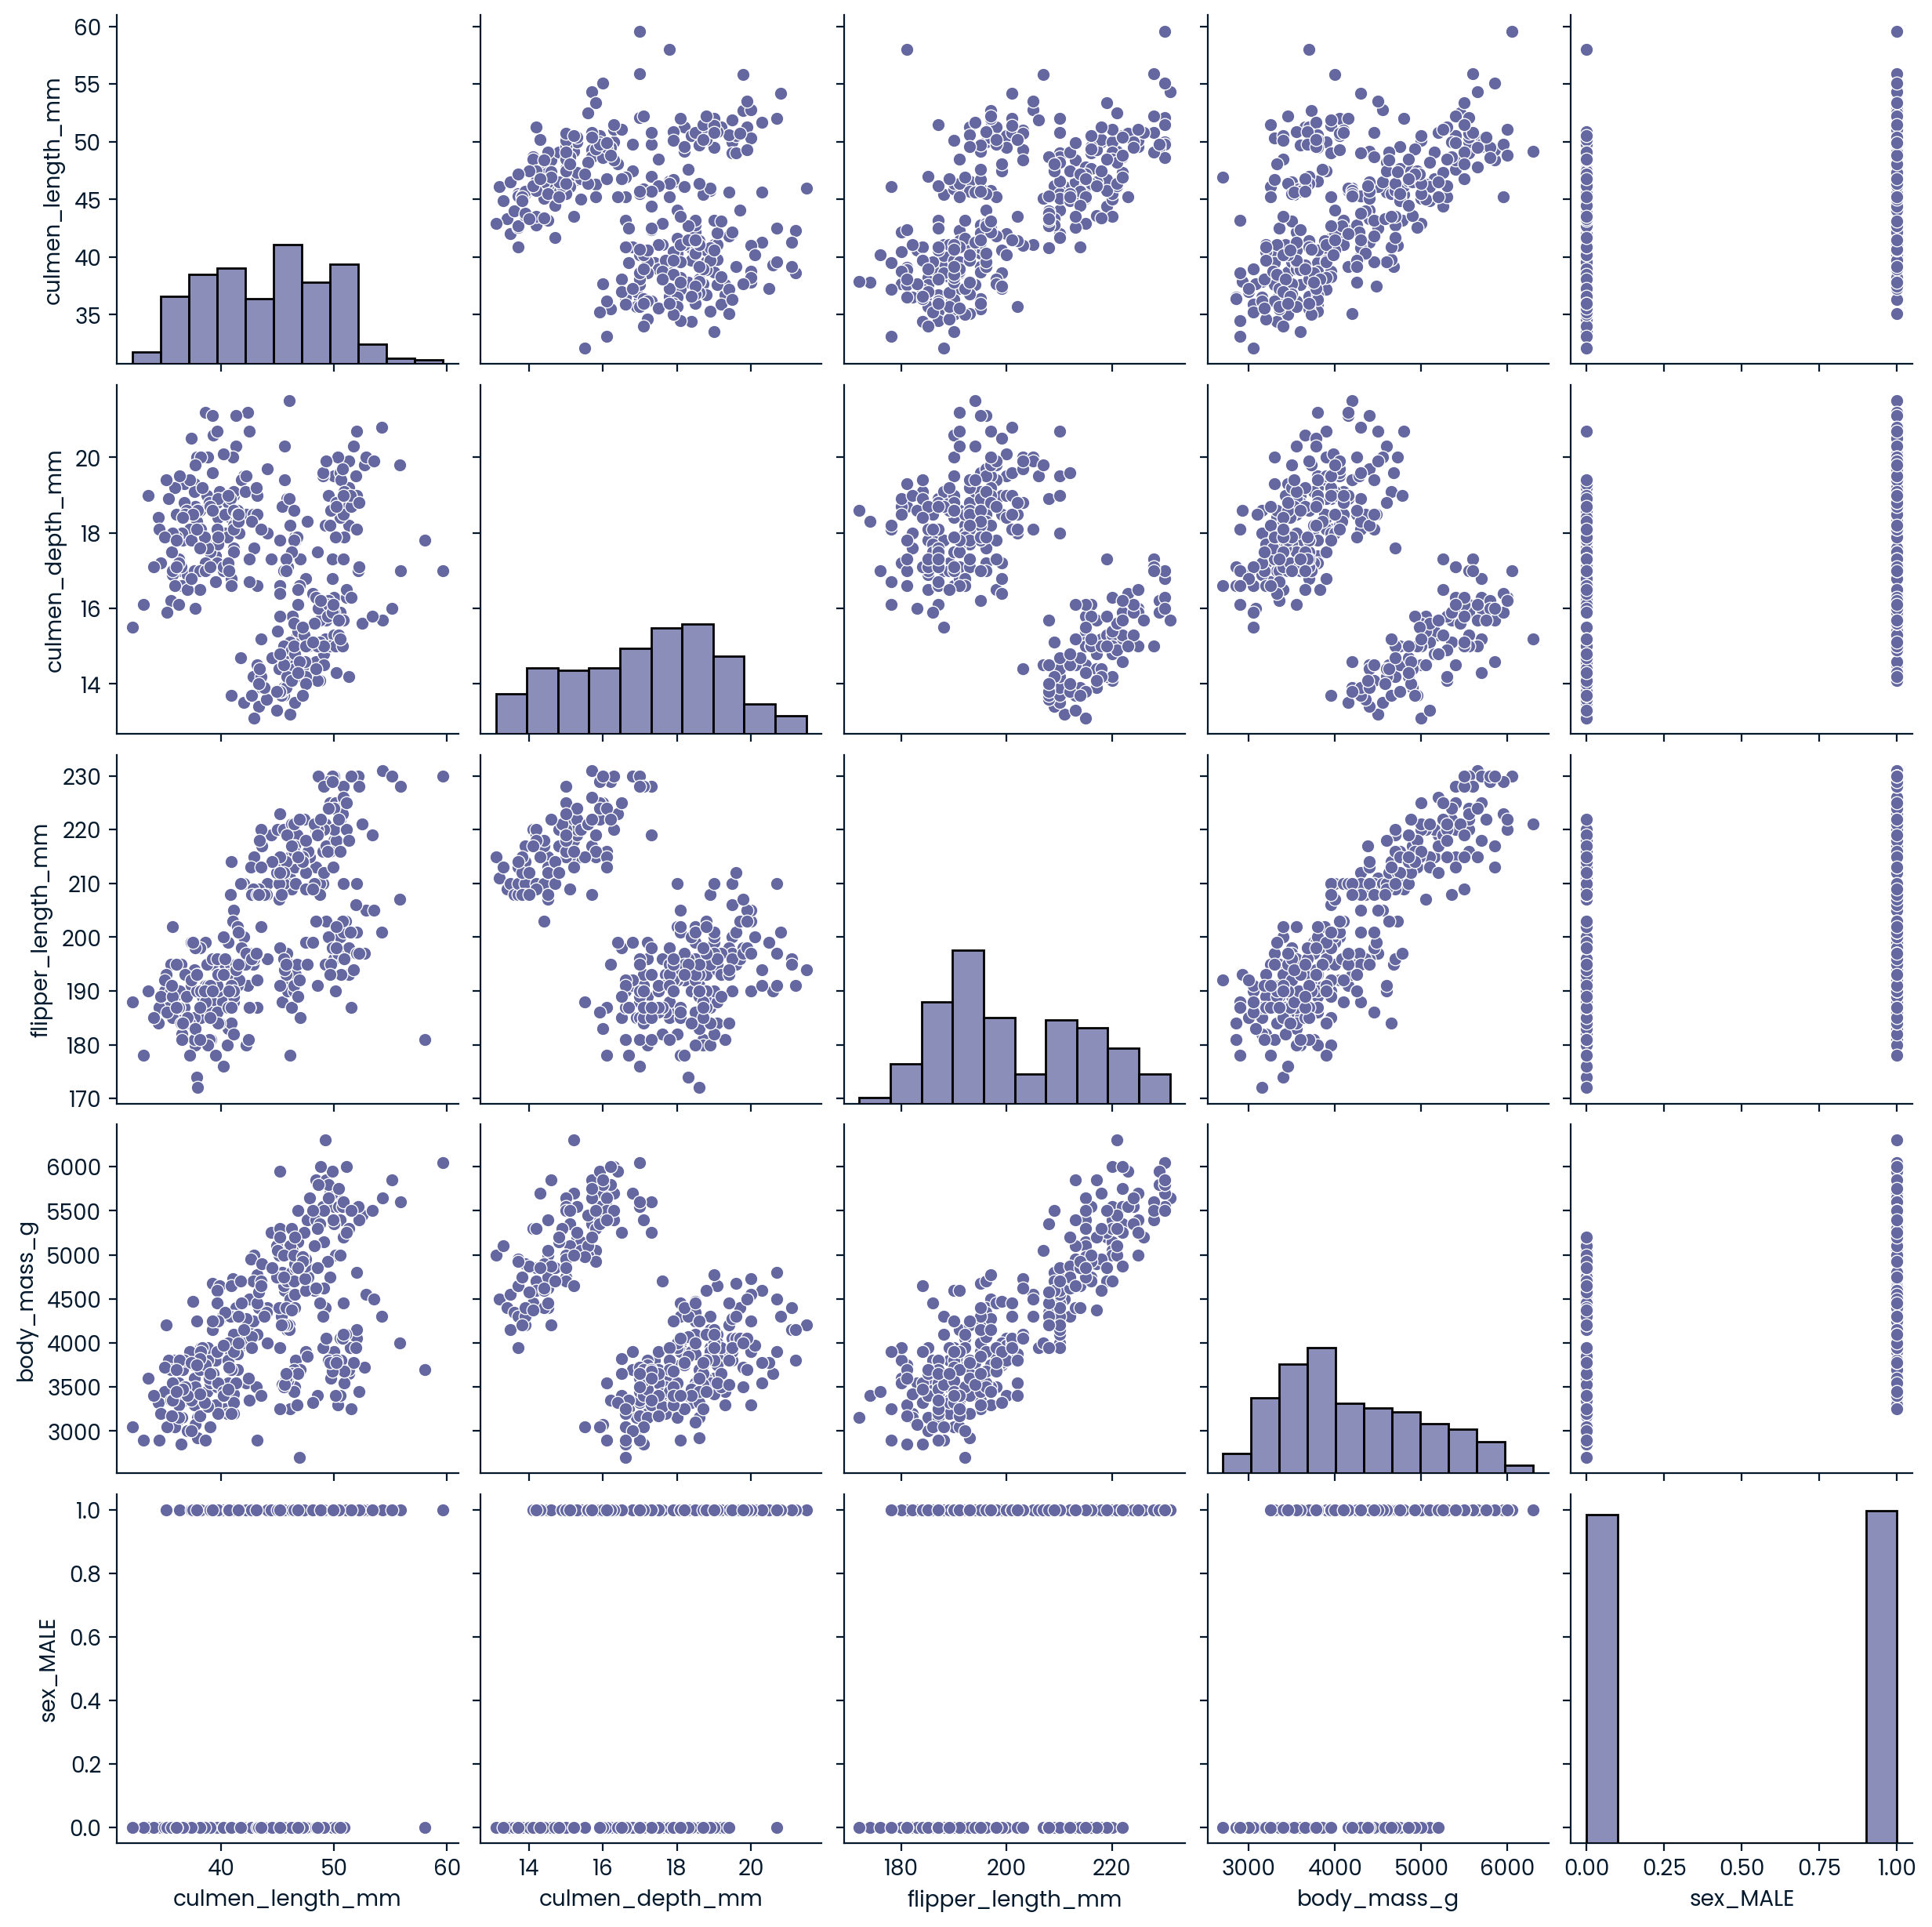

In [55]:
import seaborn as sns  
  
sns.pairplot(penguins_df)  
plt.show()

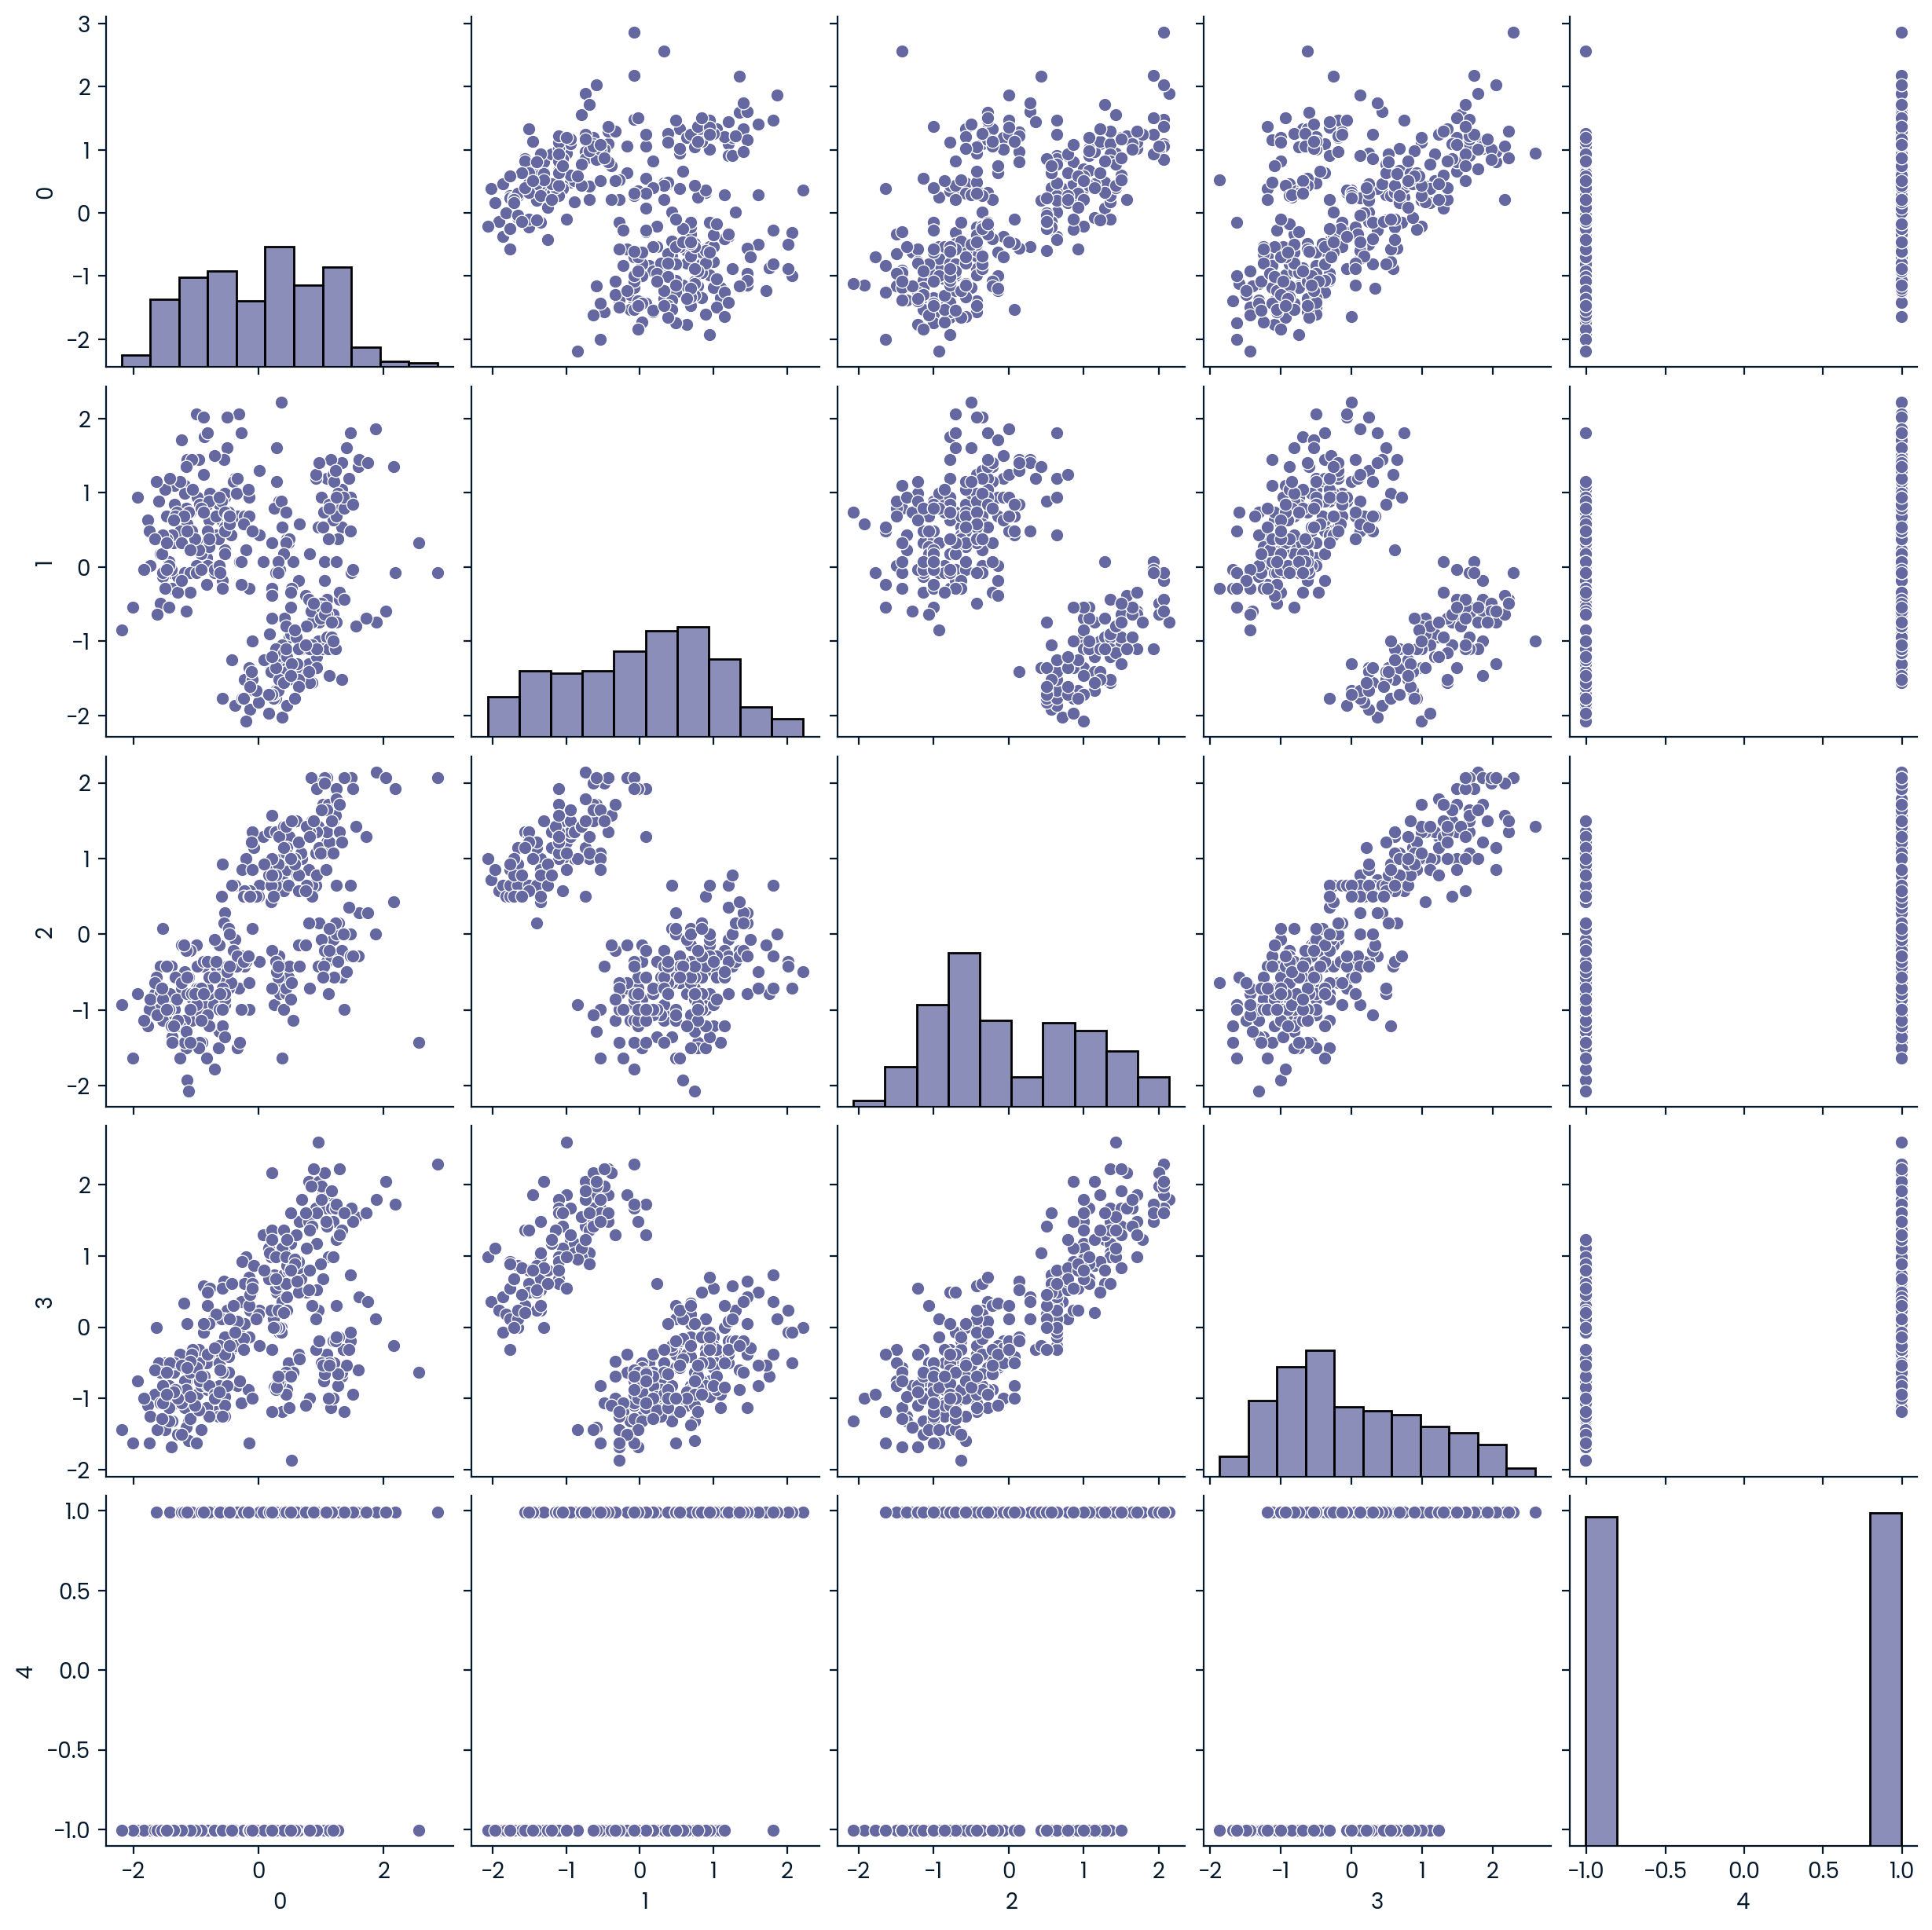

In [56]:
scaler = StandardScaler()
scaler.fit(penguins_df)
StandardScaler(copy = True, with_mean = True, with_std= True)
sample_scaled = scaler.transform(penguins_df)

scaled_df = pd.DataFrame(sample_scaled)
sns.pairplot(scaled_df)  
plt.show()

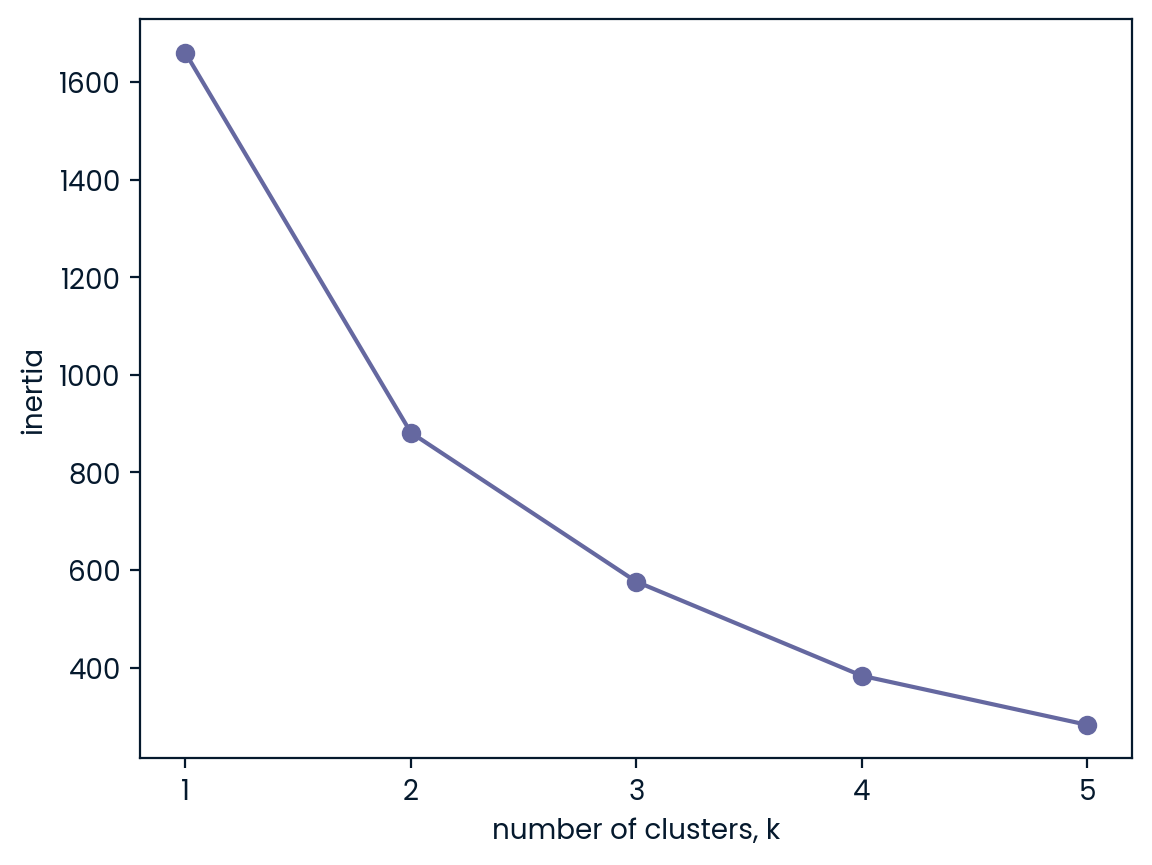

In [57]:
ks = range(1, 6)
inertias = []


for k in ks:
   # Create a KMeans instance with k clusters: model
   model = KMeans(n_clusters = k)
  
   # Fit model to samples
   model.fit(sample_scaled)
  
   # Append the inertia to the list of inertias
   inertias.append(model.inertia_)
  
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [58]:
model = KMeans(n_clusters = 4)
labels = model.fit_predict(sample_scaled)
penguins_df['cluster_labels'] = labels
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster_labels
0,39.1,18.7,181.0,3750.0,1,0
1,39.5,17.4,186.0,3800.0,0,3
2,40.3,18.0,195.0,3250.0,0,3
3,36.7,19.3,193.0,3450.0,0,3
4,39.3,20.6,190.0,3650.0,1,0


In [59]:
stat_penguins = penguins_df.groupby('cluster_labels').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
cluster_labels,,,,,
0,43.878302,19.111321,194.764151,4006.603774,1.0
1,49.473770,15.718033,221.540984,5484.836066,1.0
2,45.563793,14.237931,212.706897,4679.741379,0.0
3,40.217757,17.611215,189.046729,3419.158879,0.0
